<a href="https://colab.research.google.com/github/matheusmoura-stack/Project1/blob/main/Final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORTANDO BIBLIOTECAS E PACOTES PARA FACILITAÇÃO DA ANÁLISE**


In [58]:
!pip install matplotlib
!pip install colorama
import numpy as np
import pandas as pd 
from pandas_datareader import data as wb
from google.colab import files
import plotly.graph_objects as go
import plotly.express as px
from google.colab import drive

In [59]:
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
plt.rcParams['figure.figsize'] = (18,10)

##**Importanto dados baixados pelo Google Drive e lendo o histórico de preços**

In [60]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##**Transformando em Data Frame e renomeando para fácil acesso**

In [61]:
data_hist = pd.DataFrame(pd.read_excel('/content/drive/My Drive/Dados-Historicos.xlsx'))
data_hist['Data'] = pd.to_datetime(data_hist['Data'])
data_hist

,Data,Rendimento Mensal Poupança,Rendimento Mensal CDI,Taxa IPCA Mensal,Rendimento Mensal Selic
0,2015-01-01,0.5882,0.93,1.24,0.94
1,2015-02-01,0.5169,0.82,1.22,0.82
2,2015-03-01,0.6302,1.04,1.32,1.04
3,2015-04-01,0.6079,0.95,0.71,0.95
4,2015-05-01,0.6159,0.98,0.74,0.99
...,...,...,...,...,...
81,2021-10-01,0.3575,0.49,1.25,0.49
82,2021-11-01,0.4412,0.59,0.95,0.59
83,2021-12-01,0.4902,0.77,0.73,0.77
84,2022-01-01,0.5608,0.73,0.54,0.73


In [62]:
principal = 10000

##**Aplicando o rendimento diante da porcentagem estabelecida pelo mês de Janeiro**

In [63]:
data_hist.loc[0: ,'Rendimento Poupança'] = principal + ( principal * data_hist.loc[0:, 'Rendimento Mensal Poupança'] / 100)
data_hist.loc[1: ,'Rendimento Poupança'] = 0

In [64]:
data_hist.loc[:, 'Rendimento Poupança']

0     10058.82
1         0.00
2         0.00
3         0.00
4         0.00
        ...   
81        0.00
82        0.00
83        0.00
84        0.00
85        0.00
Name: Rendimento Poupança, Length: 86, dtype: float64

##**Aplicando rendimento para os outros mêses a partir do retorno de Janeiro com um for (Poupança)**

In [65]:
for parcela in range(1, len(data_hist)):
    principal = data_hist.loc[parcela-1, 'Rendimento Poupança']
    data_hist.loc[parcela ,'Rendimento Poupança'] = principal + ( principal * data_hist.loc[parcela, 'Rendimento Mensal Poupança'] / 100)

In [66]:
data_hist.loc[:, 'Rendimento Poupança']

0     10058.820000
1     10110.814041
2     10174.532391
3     10236.383373
4     10299.429258
          ...     
81    14182.018515
82    14244.589581
83    14314.416559
84    14394.691807
85    14466.665266
Name: Rendimento Poupança, Length: 86, dtype: float64

In [67]:
data_hist

,Data,Rendimento Mensal Poupança,Rendimento Mensal CDI,Taxa IPCA Mensal,Rendimento Mensal Selic,Rendimento Poupança
0,2015-01-01,0.5882,0.93,1.24,0.94,10058.820000
1,2015-02-01,0.5169,0.82,1.22,0.82,10110.814041
2,2015-03-01,0.6302,1.04,1.32,1.04,10174.532391
3,2015-04-01,0.6079,0.95,0.71,0.95,10236.383373
4,2015-05-01,0.6159,0.98,0.74,0.99,10299.429258
...,...,...,...,...,...,...
81,2021-10-01,0.3575,0.49,1.25,0.49,14182.018515
82,2021-11-01,0.4412,0.59,0.95,0.59,14244.589581
83,2021-12-01,0.4902,0.77,0.73,0.77,14314.416559
84,2022-01-01,0.5608,0.73,0.54,0.73,14394.691807


### **IMPLEMENTAÇÃO DE RENDIMENTO MENSAL DE CDI**

In [68]:
principal = 10000

In [69]:
data_hist.loc[0 ,'Rendimento CDI'] = principal + ( principal * data_hist.loc[0, 'Rendimento Mensal CDI'] / 100)
data_hist.loc[1: ,'Rendimento CDI'] = 0
data_hist.loc[:, 'Rendimento CDI']

0     10093.0
1         0.0
2         0.0
3         0.0
4         0.0
       ...   
81        0.0
82        0.0
83        0.0
84        0.0
85        0.0
Name: Rendimento CDI, Length: 86, dtype: float64

In [70]:
for parcela in range(1, len(data_hist)):
    principal = data_hist.loc[parcela-1, 'Rendimento CDI']
    data_hist.loc[parcela ,'Rendimento CDI'] = principal + ( principal * data_hist.loc[parcela, 'Rendimento Mensal CDI'] / 100)

In [71]:
data_hist.loc[:, 'Rendimento CDI']

0     10093.000000
1     10175.762600
2     10281.590531
3     10379.265641
4     10480.982444
          ...     
81    16940.896134
82    17040.847421
83    17172.061946
84    17297.417998
85    17428.878375
Name: Rendimento CDI, Length: 86, dtype: float64

In [72]:
data_hist

,Data,Rendimento Mensal Poupança,Rendimento Mensal CDI,Taxa IPCA Mensal,Rendimento Mensal Selic,Rendimento Poupança,Rendimento CDI
0,2015-01-01,0.5882,0.93,1.24,0.94,10058.820000,10093.000000
1,2015-02-01,0.5169,0.82,1.22,0.82,10110.814041,10175.762600
2,2015-03-01,0.6302,1.04,1.32,1.04,10174.532391,10281.590531
3,2015-04-01,0.6079,0.95,0.71,0.95,10236.383373,10379.265641
4,2015-05-01,0.6159,0.98,0.74,0.99,10299.429258,10480.982444
...,...,...,...,...,...,...,...
81,2021-10-01,0.3575,0.49,1.25,0.49,14182.018515,16940.896134
82,2021-11-01,0.4412,0.59,0.95,0.59,14244.589581,17040.847421
83,2021-12-01,0.4902,0.77,0.73,0.77,14314.416559,17172.061946
84,2022-01-01,0.5608,0.73,0.54,0.73,14394.691807,17297.417998


### **IMPLEMENTAÇÃO DE RENDIMENTO MENSAL DE SELIC**

In [73]:
principal = 10000
data_hist.loc[0 ,'Rendimento Selic'] = principal + ( principal * data_hist.loc[0, 'Rendimento Mensal Selic'] / 100)
data_hist.loc[1: ,'Rendimento Selic'] = 0
data_hist.loc[:, 'Rendimento Selic']

0     10094.0
1         0.0
2         0.0
3         0.0
4         0.0
       ...   
81        0.0
82        0.0
83        0.0
84        0.0
85        0.0
Name: Rendimento Selic, Length: 86, dtype: float64

In [74]:
for parcela in range(1, len(data_hist)):
    principal = data_hist.loc[parcela-1, 'Rendimento Selic']
    data_hist.loc[parcela ,'Rendimento Selic'] = principal + ( principal * data_hist.loc[parcela, 'Rendimento Mensal Selic'] / 100)

In [75]:
data_hist

,Data,Rendimento Mensal Poupança,Rendimento Mensal CDI,Taxa IPCA Mensal,Rendimento Mensal Selic,Rendimento Poupança,Rendimento CDI,Rendimento Selic
0,2015-01-01,0.5882,0.93,1.24,0.94,10058.820000,10093.000000,10094.000000
1,2015-02-01,0.5169,0.82,1.22,0.82,10110.814041,10175.762600,10176.770800
2,2015-03-01,0.6302,1.04,1.32,1.04,10174.532391,10281.590531,10282.609216
3,2015-04-01,0.6079,0.95,0.71,0.95,10236.383373,10379.265641,10380.294004
4,2015-05-01,0.6159,0.98,0.74,0.99,10299.429258,10480.982444,10483.058915
...,...,...,...,...,...,...,...,...
81,2021-10-01,0.3575,0.49,1.25,0.49,14182.018515,16940.896134,16954.325693
82,2021-11-01,0.4412,0.59,0.95,0.59,14244.589581,17040.847421,17054.356215
83,2021-12-01,0.4902,0.77,0.73,0.77,14314.416559,17172.061946,17185.674757
84,2022-01-01,0.5608,0.73,0.54,0.73,14394.691807,17297.417998,17311.130183


### **IMPLEMENTAÇÃO DE TAXA IPCA**

In [76]:
principal = 10000
data_hist.loc[0 ,'Taxa IPCA'] = principal + ( principal * data_hist.loc[0, 'Taxa IPCA Mensal'] / 100)
data_hist.loc[1: ,'Taxa IPCA'] = 0
data_hist.loc[:, 'Taxa IPCA']

0     10124.0
1         0.0
2         0.0
3         0.0
4         0.0
       ...   
81        0.0
82        0.0
83        0.0
84        0.0
85        0.0
Name: Taxa IPCA, Length: 86, dtype: float64

In [77]:
for parcela in range(1, len(data_hist)):
    principal = data_hist.loc[parcela-1, 'Taxa IPCA']
    data_hist.loc[parcela ,'Taxa IPCA'] = principal + ( principal * data_hist.loc[parcela, 'Taxa IPCA Mensal'] / 100)

In [78]:
data_hist

,Data,Rendimento Mensal Poupança,Rendimento Mensal CDI,Taxa IPCA Mensal,Rendimento Mensal Selic,Rendimento Poupança,Rendimento CDI,Rendimento Selic,Taxa IPCA
0,2015-01-01,0.5882,0.93,1.24,0.94,10058.820000,10093.000000,10094.000000,10124.000000
1,2015-02-01,0.5169,0.82,1.22,0.82,10110.814041,10175.762600,10176.770800,10247.512800
2,2015-03-01,0.6302,1.04,1.32,1.04,10174.532391,10281.590531,10282.609216,10382.779969
3,2015-04-01,0.6079,0.95,0.71,0.95,10236.383373,10379.265641,10380.294004,10456.497707
4,2015-05-01,0.6159,0.98,0.74,0.99,10299.429258,10480.982444,10483.058915,10533.875790
...,...,...,...,...,...,...,...,...,...
81,2021-10-01,0.3575,0.49,1.25,0.49,14182.018515,16940.896134,16954.325693,14824.456746
82,2021-11-01,0.4412,0.59,0.95,0.59,14244.589581,17040.847421,17054.356215,14965.289085
83,2021-12-01,0.4902,0.77,0.73,0.77,14314.416559,17172.061946,17185.674757,15074.535695
84,2022-01-01,0.5608,0.73,0.54,0.73,14394.691807,17297.417998,17311.130183,15155.938188


### **GRÁFICO DE COMPARAÇÃO**

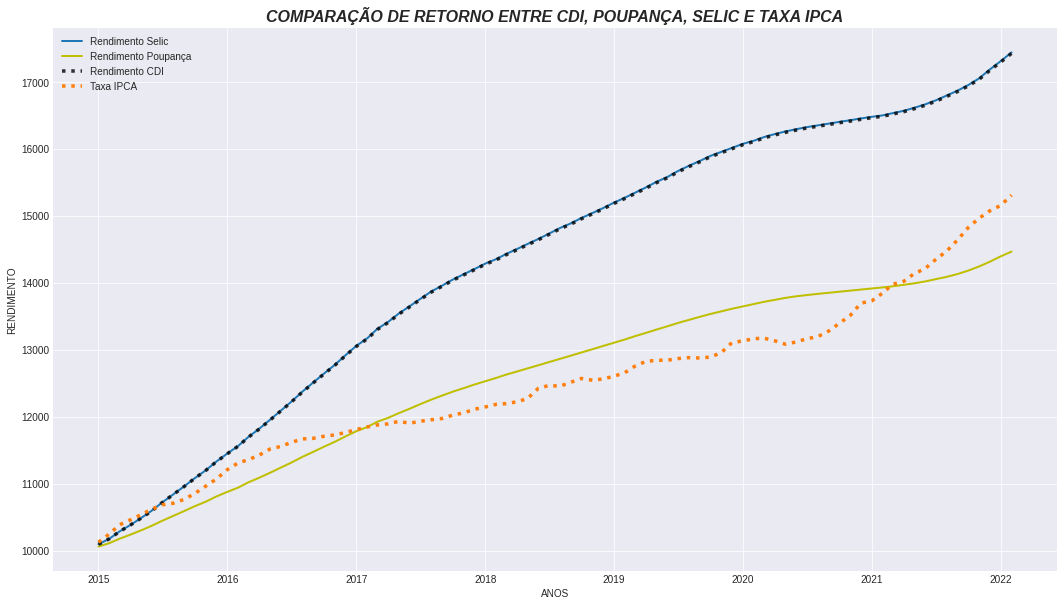

In [79]:
plt.title('COMPARAÇÃO DE RETORNO ENTRE CDI, POUPANÇA, SELIC E TAXA IPCA', fontsize=16, fontweight='bold', fontstyle='italic')
plt.ylabel('RENDIMENTO')
plt.xlabel('ANOS')
plt.plot(data_hist['Data'], data_hist['Rendimento Selic'], label = 'Rendimento Selic', linewidth=2)
plt.plot(data_hist['Data'], data_hist['Rendimento Poupança'], label = 'Rendimento Poupança',linewidth=2, c ='y')
plt.plot(data_hist['Data'], data_hist['Rendimento CDI'], label = 'Rendimento CDI',linestyle=":", c='k',linewidth=3.5, alpha=0.8)
plt.plot(data_hist['Data'], data_hist['Taxa IPCA'], label = 'Taxa IPCA', linewidth=3.5, linestyle=":")
plt.legend()

In [80]:
data_hist

,Data,Rendimento Mensal Poupança,Rendimento Mensal CDI,Taxa IPCA Mensal,Rendimento Mensal Selic,Rendimento Poupança,Rendimento CDI,Rendimento Selic,Taxa IPCA
0,2015-01-01,0.5882,0.93,1.24,0.94,10058.820000,10093.000000,10094.000000,10124.000000
1,2015-02-01,0.5169,0.82,1.22,0.82,10110.814041,10175.762600,10176.770800,10247.512800
2,2015-03-01,0.6302,1.04,1.32,1.04,10174.532391,10281.590531,10282.609216,10382.779969
3,2015-04-01,0.6079,0.95,0.71,0.95,10236.383373,10379.265641,10380.294004,10456.497707
4,2015-05-01,0.6159,0.98,0.74,0.99,10299.429258,10480.982444,10483.058915,10533.875790
...,...,...,...,...,...,...,...,...,...
81,2021-10-01,0.3575,0.49,1.25,0.49,14182.018515,16940.896134,16954.325693,14824.456746
82,2021-11-01,0.4412,0.59,0.95,0.59,14244.589581,17040.847421,17054.356215,14965.289085
83,2021-12-01,0.4902,0.77,0.73,0.77,14314.416559,17172.061946,17185.674757,15074.535695
84,2022-01-01,0.5608,0.73,0.54,0.73,14394.691807,17297.417998,17311.130183,15155.938188


### **OUTPUT DOS RETORNOS DE CADA RENDIMENTO**

In [81]:
def output(a, b):
  principal = 10000
  lucro = b - principal
  Imposto_de_Renda = lucro * 0.15
  líquido = b - Imposto_de_Renda
  print(f'- Com o investimento de R$10 mil em \033[1;32m{a}\033[0;0m (investidos em Janeiro de 2015 até Fevereiro de 2022):\n')
  print(f'   Foram retornados R${round(b, 2)} (Valor bruto), tendo R${round(lucro, 2)} de lucro.')
  print(f'   E, com o desconto do I.R. (Imposto de Renda) de R${round(Imposto_de_Renda, 2)} (15% do lucro),')
  print(f'   O investimento teve o retorno de R${round(líquido, 2)} líquidos.')
  print('\n')

In [82]:
poupança = data_hist.iloc[85, 5]
CDI = data_hist.iloc[85, 6]
selic = data_hist.iloc[85, 7]
IPCA = data_hist.iloc[85, 8]
output('Selic', selic)
output('CDI', CDI)
output('Taxa Ipca', IPCA)
output('Poupança', poupança)

- Com o investimento de R$10 mil em Selic (investidos em Janeiro de 2015 até Fevereiro de 2022):

   Foram retornados R$17442.69 (Valor bruto), tendo R$7442.69 de lucro.
   E, com o desconto do I.R. (Imposto de Renda) de R$1116.4 (15% do lucro),
   O investimento teve o retorno de R$16326.29 líquidos.


- Com o investimento de R$10 mil em CDI (investidos em Janeiro de 2015 até Fevereiro de 2022):

   Foram retornados R$17428.88 (Valor bruto), tendo R$7428.88 de lucro.
   E, com o desconto do I.R. (Imposto de Renda) de R$1114.33 (15% do lucro),
   O investimento teve o retorno de R$16314.55 líquidos.


- Com o investimento de R$10 mil em Taxa Ipca (investidos em Janeiro de 2015 até Fevereiro de 2022):

   Foram retornados R$15309.01 (Valor bruto), tendo R$5309.01 de lucro.
   E, com o desconto do I.R. (Imposto de Renda) de R$796.35 (15% do lucro),
   O investimento teve o retorno de R$14512.66 líquidos.


- Com o investimento de R$10 mil em Poupança (investidos em Janeiro de 2015 até Fe